# __Задачи__
* Импортируйте библиотеку pandas как pd. 
* Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
* Какой клиент совершил больше всего успешных операций? (success == True)
* С какой платформы осуществляется наибольшее количество успешных операций?
* Какую платформу предпочитают премиумные клиенты?
* Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
* Постройте график распределения числа успешных операций
* Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

# __Описание данных__
user_data:

* client – идентификатор пользователя
* premium – является ли клиент премиум
* age – возраст

logs:

* client – идентификатор пользователя
* success – результат (успех - 1, нет - 0)
* platform – платформа
* time – время в формате Unix

#### ___Импортируем необходимые библиотеки___

In [26]:
import pandas as pd

import requests
from urllib.parse import urlencode

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### ___Напишим функцию для получения данных с гугл-диска___

In [2]:
def get_data(df_url, sep=';'):
    """Функция для загрузки данных и их преобразования в датафрейм"""
    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=df_url))
    response = requests.get(final_url)
    download_url = response.json()['href']

    # Загружаем файл и сохраняем его
    df = pd.read_csv(download_url, sep=',')
    
    return df

In [3]:
user_data_url = "https://disk.yandex.ru/d/OO5NC1HYP6Ntug"
logs_url = "https://disk.yandex.ru/d/E67ttPSdZP2Itg"

In [4]:
user_data_df = get_data(user_data_url)
logs_df = get_data(logs_url)

#### ___Датасеты загружены и преобразованы в датафреймы___

In [5]:
user_data_df.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs_df.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


#### ___Напишем функцию для определения размера датасета, наличия пропусков и типов данных, вывода описательной статистике___

In [7]:
lst = ['shape', 'miss_data', 'data_types', 'dstats']

In [8]:
def eda(df, lst=lst):
    data = {
            'shape': df.shape,
            'miss_data': df.isna().sum(),
            'data_types': df.dtypes,
            'dstats': df.describe()
            }
    for i in lst:
        print(f"\n{str.capitalize(i)}\n{data[i]}\n")

In [9]:
eda(logs_df)


Shape
(4500, 4)


Miss_data
client      0
success     0
platform    0
time        0
dtype: int64


Data_types
client       int64
success       bool
platform    object
time         int64
dtype: object


Dstats
             client          time
count   4500.000000  4.500000e+03
mean   50998.758000  1.585440e+09
std    28374.472495  2.314866e+04
min       40.000000  1.585400e+09
25%    27056.500000  1.585420e+09
50%    52659.000000  1.585440e+09
75%    76001.250000  1.585461e+09
max    99993.000000  1.585480e+09



In [10]:
eda(user_data_df)


Shape
(2954, 3)


Miss_data
client     0
premium    0
age        0
dtype: int64


Data_types
client     int64
premium     bool
age        int64
dtype: object


Dstats
             client          age
count   2954.000000  2954.000000
mean   50767.886594    44.196005
std    28800.505847    14.248336
min       40.000000    20.000000
25%    25639.500000    32.000000
50%    51569.500000    44.000000
75%    75963.250000    56.000000
max    99973.000000    69.000000



### __Посмотрим, сколько уникальных платформ есть у нас в датасете__

In [11]:
logs_df.platform.nunique()

3

#### ___Всего 3 платформы___

### __Посмотрим, какой клиент совершил больше всего успешых операций__

In [12]:
temp = logs_df.groupby('client', as_index=False).agg({'success': 'sum'}).sort_values('success', ascending=False)
print(temp)

      client  success
3300   82563       41
1426   36165       41
2095   52870       41
468    12179       41
2469   61473       41
...      ...      ...
2157   54315        0
689    17713        0
3042   76192        0
3041   76172        0
2005   50676        0

[4011 rows x 2 columns]


In [13]:
temp.head(10)

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
3141,78349,41
1120,28719,41
2468,61468,41
3712,92584,41
2562,64064,40


#### ___Сразу 9 клиентов совершили одинаковое количество результативных действий!___

In [14]:
for i in temp.head(9).client: # их id
    if i == 92584:
        print(i)
    else:
        print(i, end=', ') 
    

82563, 36165, 52870, 12179, 61473, 78349, 28719, 61468, 92584


### __Узнаем, с какой платформы осуществляется наибольшее количество успешных операций__

In [18]:
temp = logs_df.groupby('platform')['success'].count()
temp

platform
computer    1505
phone       2753
tablet       242
Name: success, dtype: int64

In [20]:
temp.sort_values().tail(1)

platform
phone    2753
Name: success, dtype: int64

#### ___Наиболее  "успешной" плаформой являются мобильные телефоны___ 

### __Какая платформа наиболее популярна среди премиумных клиентов?__

#### ___Чтобы дать ответь на поставленный вопрос объединим наши датафреймы___

In [23]:
full_data = pd.merge(user_data_df, logs_df, on='client')
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [25]:
full_data[full_data['premium'] == 1].groupby('platform')['client'].nunique()

platform
computer    145
phone       242
tablet       24
Name: client, dtype: int64

#### ___Среди премиальных клиентов телефонная платформа наиболее популярна___

### __Визуализируйте распределение возраста клиентов в зависимости от типа клиента, используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?___

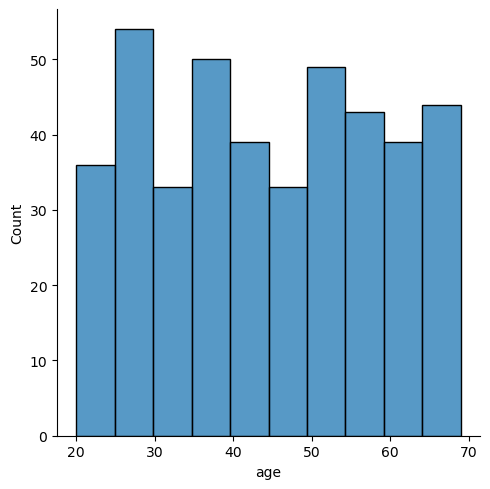

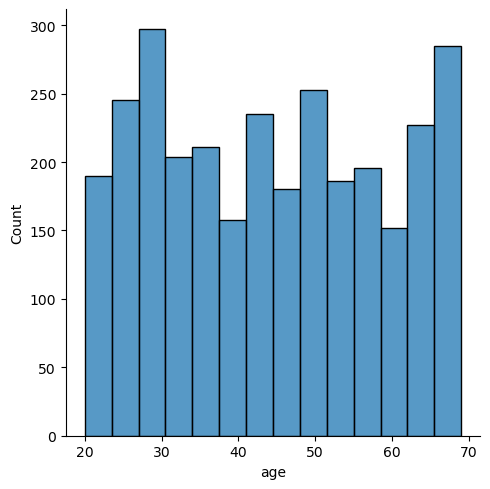

In [36]:
premium = full_data[full_data['premium'] == 1].age
not_premium = full_data[full_data['premium'] == 0].age
sns.displot(premium)
sns.displot(not_premium)

#### __Постройте график распределения числа успешных операций:__

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

C:\Anaconda\envs\Carpov\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success', ylabel='Density'>

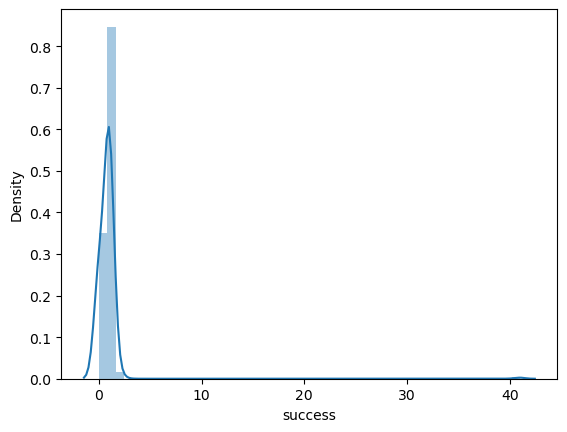

In [41]:
sns.distplot(full_data.groupby('client')['success'].sum())

___Большая часть клиентов совершила не более 5 успешных попыток, однако, в правой части графика можно увидеть, что ряд клиентов более 40 удачных операций___

__Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций.__

In [59]:
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


<AxesSubplot:xlabel='age', ylabel='count'>

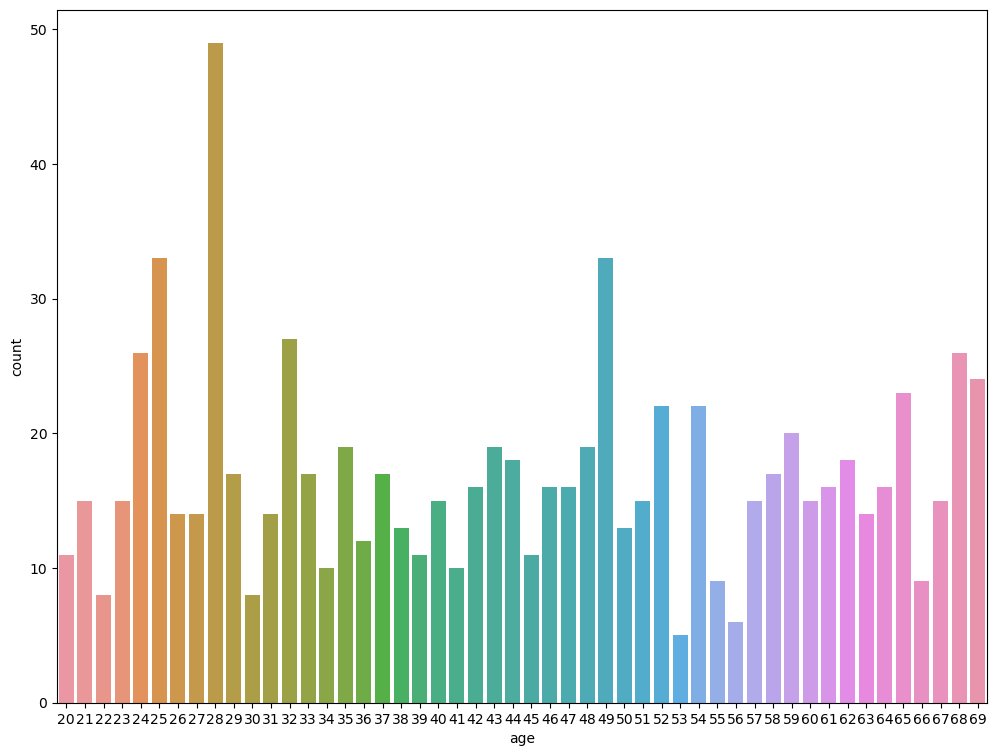

In [66]:
temp = full_data[(full_data['platform'] == 'computer') & (full_data['success'] == True)]

plt.figure(figsize=(12, 9))
sns.countplot(data=temp, x='age')

Наибольшее количество успешных траев на платформе computer совершают клиенты до 35 лет, так же заметен выброс